## Trébol SA
---

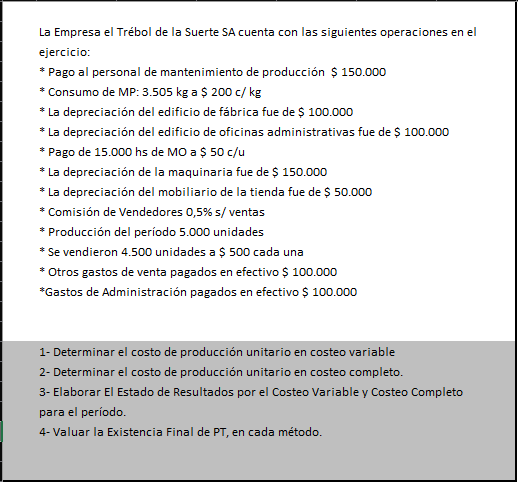

### Importaciones y configuración

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [2]:
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

In [3]:
# Datos y clasificación
def cargar_datos():
    """Carga y clasifica los datos del ejercicio"""
    datos = {
        "Personal mantenimiento producción": 150000,
        "Consumo MP": 3505 * 200,
        "Depreciación edificio fábrica": 100000,
        "Depreciación edificio oficinas": 100000,
        "Mano de obra directa": 15000 * 50,
        "Depreciación maquinaria producción": 150000,
        "Depreciación mobiliario comercial": 50000,
        "Comisión vendedores": 0.005 * (4500 * 500),  # 0.5% sobre ventas
        "Otros gastos de ventas": 100000,
        "Gastos de administración": 100000
    }
    
    clasificacion = {
        "MPD": ["Consumo MP"],
        "MOD": ["Mano de obra directa"],
        "CIF Variables": [],
        "CIF Fijos": ["Personal mantenimiento producción", "Depreciación edificio fábrica", 
                     "Depreciación maquinaria producción"],
        "Gastos Comerciales Variables": ["Comisión vendedores"],
        "Gastos Comerciales Fijos": ["Depreciación mobiliario comercial", "Otros gastos de ventas"],
        "Gastos Administrativos Fijos": ["Depreciación edificio oficinas", "Gastos de administración"]
    }
    
    unidades = {"producidas": 5000, "vendidas": 4500}
    precio_venta = 500
    
    return datos, clasificacion, unidades, precio_venta

# Cargar datos
datos, clasificacion, unidades, precio_venta = cargar_datos()

In [4]:
# Función para crear DataFrames de clasificación
def crear_df_clasificacion():
    """Crea DataFrame con la clasificación de costos"""
    datos_clasificacion = []
    for categoria, items in clasificacion.items():
        for item in items:
            datos_clasificacion.append({
                'Concepto': item,
                'Categoría': categoria,
                'Monto ($)': datos[item]
            })
    
    df_clasif = pd.DataFrame(datos_clasificacion)
    df_totales = df_clasif.groupby('Categoría')['Monto ($)'].sum().reset_index()
    df_totales['Concepto'] = 'TOTAL ' + df_totales['Categoría']
    
    return pd.concat([df_clasif, df_totales], ignore_index=True)

df_clasificacion = crear_df_clasificacion()
display(HTML("<h3 style='color: #2E86AB;'>CLASIFICACIÓN DE COSTOS Y GASTOS</h3>"))
display(df_clasificacion.style.hide(axis="index").format({'Monto ($)': '${:,.0f}'}))

Concepto,Categoría,Monto ($)
Consumo MP,MPD,"$701,000"
Mano de obra directa,MOD,"$750,000"
Personal mantenimiento producción,CIF Fijos,"$150,000"
Depreciación edificio fábrica,CIF Fijos,"$100,000"
Depreciación maquinaria producción,CIF Fijos,"$150,000"
Comisión vendedores,Gastos Comerciales Variables,"$11,250"
Depreciación mobiliario comercial,Gastos Comerciales Fijos,"$50,000"
Otros gastos de ventas,Gastos Comerciales Fijos,"$100,000"
Depreciación edificio oficinas,Gastos Administrativos Fijos,"$100,000"
Gastos de administración,Gastos Administrativos Fijos,"$100,000"


In [5]:
# Función para calcular costos de producción
def calcular_costos_produccion():
    """Calcula costos de producción para ambos métodos"""
    # Costos variables de producción
    mpd = datos["Consumo MP"]
    mod = datos["Mano de obra directa"]
    cif_variables = 0  # No hay CIF variables en este ejercicio
    
    costo_variable_total = mpd + mod + cif_variables
    costo_variable_unitario = costo_variable_total / unidades["producidas"]
    
    # Costos fijos de producción
    cif_fijos = sum([datos[item] for item in clasificacion["CIF Fijos"]])
    costo_fijo_unitario = cif_fijos / unidades["producidas"]
    
    # Costeo completo
    costo_completo_total = costo_variable_total + cif_fijos
    costo_completo_unitario = costo_completo_total / unidades["producidas"]
    
    return {
        'variable': {
            'total': costo_variable_total,
            'unitario': costo_variable_unitario
        },
        'completo': {
            'total': costo_completo_total,
            'unitario': costo_completo_unitario
        },
        'cif_fijos': cif_fijos
    }

costos_produccion = calcular_costos_produccion()

# Mostrar costos de producción
df_costos_prod = pd.DataFrame({
    'Concepto': ['Costo Variable Total', 'Costo Variable Unitario', 
                 'Costo Completo Total', 'Costo Completo Unitario',
                 'CIF Fijos Totales'],
    'Valor': [
        costos_produccion['variable']['total'],
        costos_produccion['variable']['unitario'],
        costos_produccion['completo']['total'],
        costos_produccion['completo']['unitario'],
        costos_produccion['cif_fijos']
    ]
})

display(HTML("<h3 style='color: #A23B72;'>COSTOS DE PRODUCCIÓN</h3>"))
display(df_costos_prod.style.hide(axis="index").format({'Valor': '${:,.2f}'}))

Concepto,Valor
Costo Variable Total,"$1,451,000.00"
Costo Variable Unitario,$290.20
Costo Completo Total,"$1,851,000.00"
Costo Completo Unitario,$370.20
CIF Fijos Totales,"$400,000.00"


In [6]:
# Función para calcular estados de resultados
def calcular_estados_resultados():
    """Calcula estados de resultados para ambos métodos"""
    ventas_totales = unidades["vendidas"] * precio_venta
    
    # Costeo Variable
    costo_ventas_variable = unidades["vendidas"] * costos_produccion['variable']['unitario']
    gastos_comerciales_var = datos["Comisión vendedores"]
    contribucion_marginal = ventas_totales - costo_ventas_variable - gastos_comerciales_var
    
    # Costos fijos
    gastos_comerciales_fijos = sum([datos[item] for item in clasificacion["Gastos Comerciales Fijos"]])
    gastos_administrativos = sum([datos[item] for item in clasificacion["Gastos Administrativos Fijos"]])
    cif_fijos = costos_produccion['cif_fijos']
    
    resultado_variable = contribucion_marginal - cif_fijos - gastos_administrativos - gastos_comerciales_fijos
    
    # Costeo Completo
    costo_ventas_completo = unidades["vendidas"] * costos_produccion['completo']['unitario']
    resultado_bruto = ventas_totales - costo_ventas_completo
    
    gastos_periodo = gastos_comerciales_var + gastos_comerciales_fijos + gastos_administrativos
    resultado_completo = resultado_bruto - gastos_periodo
    
    return {
        'variable': {
            'ventas': ventas_totales,
            'costo_ventas': costo_ventas_variable,
            'gastos_comerciales_var': gastos_comerciales_var,
            'contribucion_marginal': contribucion_marginal,
            'cif_fijos': cif_fijos,
            'gastos_administrativos': gastos_administrativos,
            'gastos_comerciales_fijos': gastos_comerciales_fijos,
            'resultado': resultado_variable
        },
        'completo': {
            'ventas': ventas_totales,
            'costo_ventas': costo_ventas_completo,
            'resultado_bruto': resultado_bruto,
            'gastos_periodo': gastos_periodo,
            'resultado': resultado_completo
        }
    }

estados_resultados = calcular_estados_resultados()

In [7]:
# Mostrar estado de resultados variable
df_er_variable = pd.DataFrame({
    'Concepto': ['Ventas', 'Costo de Ventas Variable', 
                 'Gastos Comerciales Variables', 'Contribución Marginal',
                 'Costos Fijos Producción', 'Gastos Administrativos',
                 'Gastos Comerciales Fijos', 'RESULTADO FINAL'],
    'Valor': [
        estados_resultados['variable']['ventas'],
        estados_resultados['variable']['costo_ventas'],
        estados_resultados['variable']['gastos_comerciales_var'],
        estados_resultados['variable']['contribucion_marginal'],
        estados_resultados['variable']['cif_fijos'],
        estados_resultados['variable']['gastos_administrativos'],
        estados_resultados['variable']['gastos_comerciales_fijos'],
        estados_resultados['variable']['resultado']
    ]
})

display(HTML("<h3 style='color: #3B8EA5;'>ESTADO DE RESULTADOS - COSTEO VARIABLE</h3>"))
display(df_er_variable.style.hide(axis="index").format({'Valor': '${:,.2f}'}))

Concepto,Valor
Ventas,"$2,250,000.00"
Costo de Ventas Variable,"$1,305,900.00"
Gastos Comerciales Variables,"$11,250.00"
Contribución Marginal,"$932,850.00"
Costos Fijos Producción,"$400,000.00"
Gastos Administrativos,"$200,000.00"
Gastos Comerciales Fijos,"$150,000.00"
RESULTADO FINAL,"$182,850.00"


In [10]:
# Mostrar estado de resultados completo
df_er_completo = pd.DataFrame({
    'Concepto': ['Ventas', 'Costo de Ventas Completo', 
                 'Resultado Bruto', 'Gastos del Período',
                 'RESULTADO FINAL'],
    'Valor': [
        estados_resultados['completo']['ventas'],
        estados_resultados['completo']['costo_ventas'],
        estados_resultados['completo']['resultado_bruto'],
        estados_resultados['completo']['gastos_periodo'],
        estados_resultados['completo']['resultado']
    ]
})

display(HTML("<h3 style='color: #8E44AD;'>ESTADO DE RESULTADOS - COSTEO COMPLETO</h3>"))
display(df_er_completo.style.hide(axis="index").format({'Valor': '${:,.2f}'}))

Concepto,Valor
Ventas,"$2,250,000.00"
Costo de Ventas Completo,"$1,665,900.00"
Resultado Bruto,"$584,100.00"
Gastos del Período,"$361,250.00"
RESULTADO FINAL,"$222,850.00"


In [9]:
# Función para valuar existencias
def calcular_existencias():
    """Calcula valuación de existencias finales"""
    unidades_stock = unidades["producidas"] - unidades["vendidas"]
    
    valor_variable = unidades_stock * costos_produccion['variable']['unitario']
    valor_completo = unidades_stock * costos_produccion['completo']['unitario']
    diferencia = valor_completo - valor_variable
    
    return {
        'unidades_stock': unidades_stock,
        'valor_variable': valor_variable,
        'valor_completo': valor_completo,
        'diferencia': diferencia
    }

existencias = calcular_existencias()

# Mostrar valuación de existencias
df_existencias = pd.DataFrame({
    'Concepto': ['Unidades en Stock', 
                 'Valor Existencia (Variable)',
                 'Valor Existencia (Completo)',
                 'Diferencia en Valuación'],
    'Valor': [
        existencias['unidades_stock'],
        existencias['valor_variable'],
        existencias['valor_completo'],
        existencias['diferencia']
    ]
})

display(HTML("<h3 style='color: #27AE60;'>VALUACIÓN DE EXISTENCIAS FINALES</h3>"))
display(df_existencias.style.hide(axis="index").format({'Valor': '{:,.2f}'}))

Concepto,Valor
Unidades en Stock,500.00
Valor Existencia (Variable),"145,100.00"
Valor Existencia (Completo),"185,100.00"
Diferencia en Valuación,"40,000.00"
